# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Assets.Loading_Datasets import *

# Datasets

Arguments:

    train_label:    It declares which fruit this data belongs
    train_value:    It has value of every pixle (in this case we extracted the values)

**Dimensions**:

            train_set_features:     (1962, 102)
            train_set_labels:       (1962, 1)
            train_label:            (1962, 4)
            train_value1:           (102,200)
            train_lable1:           (200, 4)
            train_value2:           (102,1762)
            train_lable2:           (1762, 4)

In [71]:
shuffle = np.random.permutation(len(train_set_features))
train_set_features = train_set_features[shuffle]
train_set_labels = train_set_labels[shuffle]

m, n = train_set_features.shape
sample_num = 200

# labels
train_label = np.zeros((m,4))
for i in range(len(train_set_labels)):
    train_label[i][int(train_set_labels[i])] = 1 

# sample data
train_value1 = train_set_features[0:sample_num].T
train_value1 = np.reshape(train_value1, (n, sample_num))
assert(train_value1.shape == (n,sample_num))

# sample labels
train_label1 = train_label[0:sample_num]
train_label1 = np.reshape(train_label1, (sample_num, 4))
assert(train_label1.shape == (sample_num, 4))


# remain samples data
train_value2 = train_set_features[sample_num:m].T
assert(train_value2.shape == (n,m-sample_num))

# remain samples labels
train_label2 = train_label[sample_num:m]
train_label2 = np.reshape(train_label2, (m-sample_num, 4))
assert(train_label2.shape == (m-sample_num, 4))

train_label1


# Initialization
layer_dims: python array (list) containing the dimensions of each layer in our network

parameters: python dictionary containing our parameters "W1", "b1", ..., "WL", "bL":

                    Wl: weight matrix 
                    bl: bias vector


procedure:

we assign a random number for every weight and a 0 for all biases 

**Dimensions**:

            Wl: (layer_dims[l], layer_dims[l-1])
            bl: (layer_dims[l], 1)

In [3]:
def initialize_parameters_deep(layer_dims):
   
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [3]:
p = initialize_parameters_deep([102,150,60,4])
p['W1']

# Network Shape

Our network will have 4 layers including output layer.

In the input layer, we have 102 items followed by 2 hidden layers with 150 and 60 items.

Also, in the output layer, we have for items which are: apple, lemon, mango and raspberry, respectively.

In [70]:
# parameters = initialize_parameters_deep([102,150,60,4])
# parameters['W3'].shape
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))
# print("W3 = " + str(parameters["W3"]))
# print("b3 = " + str(parameters["b3"]))

# Activation function

**Sigmoid:**
    
    Arguments:
    Z:       numpy array of any shape
    
    Returns:
    A:       output of sigmoid(z), same shape as Z
    cache:   returns Z as well, useful during backpropagation

**Relu:**

    Arguments:
    Z:       Output of the linear layer, of any shape
    Returns:
    A:       Post-activation parameter, of the same shape as Z
    cache:   storing "A" for computing the backward pass efficiently

**Dimentions**:
                
                Z(l): (layer_dims(l), sample_num)
                A(l): (layer_dims(l), sample_num)

In [4]:
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z

    assert(A.shape == Z.shape)
    
    return A, cache

In [5]:
def relu(Z):
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

# Forward-Propagation

Implement the **linear part** of a layer's forward propagation.

    Arguments:

    A:      activations from previous layer (or input data): (size of previous layer, number of examples)
    W:      weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b:      bias vector, numpy array of shape (size of the current layer, 1)

    Returns:

    Z:      the input of the activation function, also called pre-activation parameter.
    cache:  storing "A", "W" and "b" for computing the backward pass efficiently.

    **Dimensions**:

                A:  (layer_dims(l-1), sample_num)
                W:  (layer_dims(l), layer_dims(l-1))
                b:  (layer_dims(l), 1)
                Z:  (layer_dims(l), sample_num)

In [6]:
def linear_forward(A, W, b):
    
    Z = np.dot(W,A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

# Activate the linear part of Forward-Propagation

Implement the forward propagation for the LINEAR->ACTIVATION part

    Arguments:

    A_prev:     activations from previous layer (or input data): (size of previous layer, number of examples)
    W:          weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b:          bias vector, numpy array of shape (size of the current layer, 1)
    activation: the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:

    A:          the output of the activation function, also called the post-activation value 
    cache:      storing "linear_cache" and "activation_cache" for computing the backward pass efficiently

In [7]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
    
        Z, linear_cache = linear_forward(A_prev, W, b) 
        A, activation_cache = sigmoid(Z) 
    
    elif activation == "relu":
    
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z) 
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    cache = (linear_cache, activation_cache)

    return A, cache

# Forward-Propagation for all layers
    
**Arguments:**

    X:           data, numpy array of shape (input size, number of examples)
    parameters:  output of initialize_parameters_deep()
    
**Returns:**

    A:          last post-activation value
    caches:      list of caches containing:
                    every cache of activating linear part of forward-propagation (there are L-1 of them, indexed from 0 to L-1)

Dimensions:

            A_prev:  (layer_dims(l-1), sample_num)
            A:  (layer_dims(l), sample_num)

In [8]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    for l in range(1, L+1):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "sigmoid")
        caches.append(cache)
    
    assert(A.shape == (4,X.shape[1])) 
    # --------------------------------------
    return A, caches

In [63]:
parameters = initialize_parameters_deep([102,150,60,4])
A, caches = L_model_forward(train_value1,parameters)
# caches = np.array(caches, dtype=object)
# caches[0][0][0]

# Cost function


We can use 2 ways to calculate the cost of network:

                                                SSE
                                                CE

**SSE**

In [13]:
def compute_SSE(value, lable):
    sse = 0
    m = label[0].shape
    for j in range(4):
        sse += (label[j] - value[j])^2
    
    return sse

**Cross**-**Entropy**

Arguments:

        AL:     probability vector corresponding to our label predictions, shape (1, number of examples)
        Y:      true "label" vector

Returns:

        cost:   cross-entropy cost

Dimensions:

        cost:  (1)
        Y:     (layer_dims(L), sample_num)  -> L is number of layers

In [9]:
def compute_cost(AL, Y):

    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    cost = cost.sum()
    cost = np.squeeze(cost)      # this turns [[17]] into 17
    assert(cost.shape == ())
    
    return cost

# Back-Propagation

We need to calculate Gradient of the cost respect to the parameters. then times it to a learning factor and finally upgrade the parameters.

We will use 2 ways:
                    one way is that we use some loops to iterate all over the network
                    another way is that we use matrix operations 

# Using Loops

In [36]:
def calculate_gradient(value, lable):
    for i in range(value.size):
        A, caches = L_model_forward(value[i], parameters)
        sse = compute_SSE(A.T, lable[i])

# Vectorization

Using matrix operations

# Activation function Gradient

Implement the backward propagation for a single **SIGMOID** unit.

    Arguments:

        dA:      post-activation gradient, of any shape
        cache:   Z where we store for computing backward propagation efficiently

    Returns:
    
        dZ:      Gradient of the cost with respect to Z

    Dimensions:

                dA:     (layer_dims(l), sample_num)
                Z:      (layer_dims(l-1), sample_num)
                dZ:     (layer_dims(l-1), sample_num)

                here A in layer_dims(l) and Z in layer_dims(l-1) have equal dimentions.

In [10]:
def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [8]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

# Gradient of parameters for a singl layer

Here **cache** is "linear_cache" containing (A_prev, W, b) coming from the forward propagation in the current layer
   

Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b

Dimensions:

            A_prev:      (layer_dims(l-1), sample_num)
            W:           (layer_dims(l), layer_dims(l-1))
            b:           (layer_dims(l), 1)
            dz:          (layer_dims(l), sample_num)
            dA_prev:     (layer_dims(l-1), sample_num)
            dW:          (layer_dims(l), layer_dims(l-1))
            db:          (layer_dims(l), 1)

In [11]:
def linear_backward(dZ, cache):
   
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [12]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

# Obtain Gradient

Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 

In [13]:
def L_model_backward(AL, Y, caches):
   
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1] # Last Layer
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
#    فک کنم اینجا باید مستقیم نود لایه اخر رو بدیم یعنی نیازی به سیگموید نداره
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        grads["dA" + str(l)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "sigmoid")

# ----------------------------------------
    return grads

# Update Parameters

Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...

In [14]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

# Get Accuracy

In [95]:
def get_accuracy(predictions, Y):
    # print("predictions: ", predictions)
    return np.sum(predictions == Y) / Y.shape[1]

# Prediction

In [16]:
def get_predictions(A):
    return np.argmax(A, 0)

# Implement a L-layer neural network

 Arguments:

    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    
    parameters -- parameters learnt by the model. They can then be used to predict.

In [131]:
def L_layer_model(data, label, layers_dims, learning_rate, num_iterations, print_cost):
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. 
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
    
        
        # shuffle = np.random.permutation(data.shape[1])
        # data = data.T[shuffle]
        # label = label[shuffle]

        # Forward propagation:
        AL, caches = L_model_forward(data, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, label)
    
        # Backward propagation.
        grads = L_model_backward(AL, label, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # print("parameters: ", parameters["W2"][10][2])
                
        # Print the cost every 100 training example
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            # print("AL: ", AL)
            predictions = get_predictions(AL)
            # print("predictions: ", predictions)
            print("Accuracy: ", get_accuracy(predictions, label))
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [42]:
Y = np.array([[0.0, 0.0, 1.0, 0.0],
            [1.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0]])
predict = np.array([2, 0, 1, 3])
s = np.sum(predict == Y) / Y.shape[1]
s

1.0

Cost after iteration 0: 11.175704
Accuracy:  0.0
Cost after iteration 10: 9.015538
Accuracy:  1.0
Cost after iteration 20: 9.015491
Accuracy:  1.0
Cost after iteration 30: 9.015491
Accuracy:  1.0


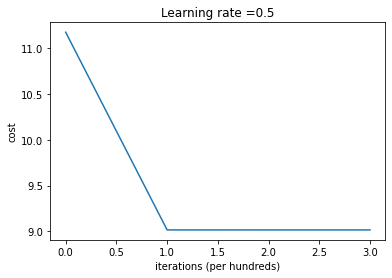

In [134]:
layers_dims = [102, 150, 60, 4]
parameters = L_layer_model(train_value1, train_label1.T, layers_dims, 0.5, 40, True)

In [0]:
# pred_train = predict(train_value1, train_lable1, parameters)

In [26]:
a = np.arange(6).reshape(2,3) + 10
np.argmax(a, 0)